Examine basic training from scikitlearn and BDTs to see how it compares with TMVA

## Initalization

In [2]:
import pandas as pd
from glob import glob

import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Load in Data

In [3]:
def load_sample(name_pattern):
    '''Load in all files with prefex name.
    
    Args:
        name_pattern - path pattern that resolves to a set of files
        
    Returns
        df - Dataframe of all files contacted together
    '''
    files = glob(name_pattern)
    if len(files) == 0:
        print ("No files found matching {0}".format(name_pattern))
        return
    
    dfs = [pd.read_pickle(f) for f in files]
    df = dfs[0]
    for adf in dfs[1:]:
        df = df.append(adf)
    return df

In [4]:
job = "8"
bib = load_sample("../../MVARawData/{0}/bib16*.p".format(job))
multijet = load_sample("../../MVARawData/{0}/multijet*.p".format(job))
signal = load_sample("../../MVARawData/{0}/signal*.p".format(job))

In [5]:
print ("BIB length: {0}".format(len(bib.index)))
print ("Multijet length: {0}".format(len(multijet.index)))
print ("Signal length: {0}".format(len(signal.index)))

BIB length: 156359
Multijet length: 1499995
Signal length: 1322937


In [6]:
bib

,RunNumber,Weight,JetPt,JetPhi,CalRatio,JetEta,NTracks,SumPtOfAllTracks,MaxTrackPt,EventNumber,...,HadronicLayer1Fraction,JetLat,JetLong,FirstClusterRadius,ShowerCenter,BIBDeltaTimingM,BIBDeltaTimingP,PredictedLz,PredictedLxy,InteractionsPerCrossing
0,298595,0.000178,133.730000,0.397769,-0.777435,-1.268545,3,74.643564,60.003666,2262875,...,0.596887,0.921875,0.960938,3120.0,378.0,0.744219,18.227934,1231.849243,705.818604,24.425060
1,298595,0.000153,112.901305,-2.657582,-0.477073,1.901435,4,32.040416,9.327731,2262875,...,0.176151,0.886719,0.804688,4128.0,200.0,25.820207,-0.427745,1717.306152,397.442932,24.425060
2,298595,0.000420,182.822375,1.463564,-0.490499,-0.592727,10,103.852102,30.136543,2255625,...,0.514041,0.921875,0.984375,2080.0,338.0,3.948894,10.950156,500.725281,859.729004,24.625172
3,298595,0.000156,119.938680,-1.541466,-0.229717,-1.375710,7,33.868330,5.918807,2255625,...,0.682828,0.890625,0.886719,3408.0,788.0,2.209082,22.090730,1589.537720,834.938965,24.625172
4,298595,0.000122,43.329121,-2.584410,-0.269303,-2.324165,2,8.916597,5.290723,2255625,...,0.797777,0.898438,0.894531,4704.0,852.0,-1.496158,29.106327,2382.485107,584.673584,24.625172
5,298609,0.000198,96.281695,0.028014,1.589083,-1.259919,0,0.479726,0.479726,708347,...,0.091911,0.730469,0.894531,6368.0,3504.0,0.217223,36.191234,5250.587402,3066.169189,21.234472
6,298609,0.000154,106.873477,-2.630504,0.607565,-0.315291,3,73.144909,60.989149,1112610,...,0.723943,0.796875,0.925781,2704.0,1312.0,5.707424,10.718132,447.836243,1486.562134,23.524567
7,298609,0.000163,100.220047,1.227792,-0.497685,1.796808,6,69.867659,27.166773,1112610,...,0.474304,0.792969,0.875000,4288.0,338.0,26.040814,-1.009941,1835.371216,492.507538,23.524567
8,298609,0.000213,145.293781,-0.460418,0.018107,-0.500424,4,118.046132,91.290495,654363,...,0.534366,0.945312,0.863281,3168.0,1520.0,5.504833,14.965143,352.283142,918.237488,24.089895
9,298609,0.000168,124.736695,2.492650,0.147832,1.707644,7,83.821814,23.725308,654363,...,0.424147,0.960938,0.941406,5152.0,1104.0,32.245512,0.203118,2474.509521,780.071106,24.089895


## Run simple BDT

In [47]:
def prep_samples (bib, mj, sig, nEvents = 0):
    '''Convert the input data frames into samples that are ready to feed to the
    scikitlearn infrastructure.
    
    Args
        bib - the bib dataframe
        mj - the mj dataframe
        sig - the signal dataframe
        nEvents - how many events to prepare. 0 means use everything.
        
    Returns
        events - all the events appended in a dataframe
        event_classes - class index (0 is bib, 1 for mj, and 2 for sig)
    '''
    # Append the three inputs, as they are what we will be fitting against.
    # At the same time (to keep things straight) build the class sigle array.
    s_bib = bib if nEvents == 0 else bib[:nEvents]
    s_bib_class = pd.DataFrame(np.zeros(len(s_bib.index)), columns=['Class'], dtype = 'int64')
    s_mj = mj if nEvents == 0 else mj[:nEvents]
    s_mj_class = pd.DataFrame(np.ones(len(s_mj.index)), columns=['Class'], dtype = 'int64')
    s_sig = sig if nEvents == 0 else sig[:nEvents]
    s_sig_class = pd.DataFrame(np.ones(len(s_sig.index))*2, columns=['Class'], dtype = 'int64')
    
    all_events = s_bib.append(s_mj, ignore_index=True)
    all_events = all_events.append(s_sig, ignore_index=True)
    
    all_events_class = s_bib_class.append(s_mj_class, ignore_index=True)
    all_events_class = all_events_class.append(s_sig_class, ignore_index=True)

    training_variable_list = ['JetPt', 'CalRatio',
       'NTracks', 'SumPtOfAllTracks', 'MaxTrackPt',
       'JetWidth', 'EnergyDensity',
       'HadronicLayer1Fraction', 'JetLat', 'JetLong', 'FirstClusterRadius',
       'ShowerCenter', 'BIBDeltaTimingM', 'BIBDeltaTimingP', 'PredictedLz',
       'PredictedLxy']
    
    return (all_events.loc[:,training_variable_list], all_events_class)

def train_me (bib, mj, sig, nEvents = 10000):
    '''Return training on nEvents
    
    Classes are 0 for bib, 1 for mj, and 2 for sig
    
    All events will be used in the fit (none for testing!)
    
    Args:
        bib - BIB background
        mj - MJ background
        sig - signal
        nEvents - how many events of each to use
    '''
    
    all_events, all_events_class = prep_samples(bib, mj, sig, nEvents)
    
    # Ready to train!
    bdt_discrete = AdaBoostClassifier(
        DecisionTreeClassifier(min_samples_leaf=0.01),
        n_estimators=100,
        learning_rate=1)
    
    bdt_discrete.fit(all_events, all_events_class.Class)
    
    # The BDT is sent back for use
    return bdt_discrete

In [48]:
%%time
test_EventMod = 3
per_sample_size=50000
bdt = train_me(bib[bib.EventNumber % test_EventMod != 0],
               multijet[multijet.EventNumber % test_EventMod != 0], 
               signal[signal.EventNumber % test_EventMod != 0],
               nEvents = per_sample_size)
bdt

Wall time: 6min 9s


## Plot the performance

In [49]:
%%time
test_errors = []
test_events, test_classes = prep_samples(bib[bib.EventNumber % test_EventMod == 0],
                                         multijet[multijet.EventNumber % test_EventMod == 0], 
                                         signal[signal.EventNumber % test_EventMod == 0],
                                         nEvents=per_sample_size)
for test_predict in bdt.staged_predict(test_events):
    test_errors.append(1.0 - accuracy_score(test_predict, test_classes.Class))

n_trees = len(bdt)
estimator_errors = bdt.estimator_errors_[:n_trees]

print ("Number of trees is {0}".format(n_trees))


Number of trees is 100
Wall time: 5.12 s


C:\Users\gordonwatts\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


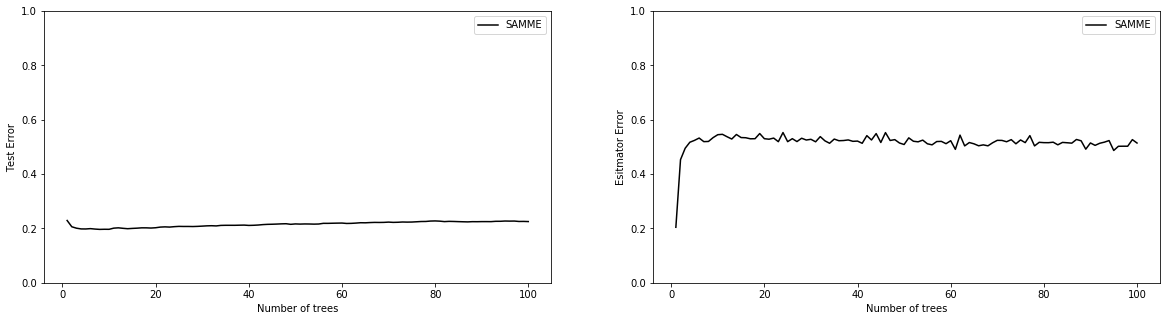

In [50]:
fig = plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(range(1, n_trees+1), test_errors, c='black', label='SAMME')
plt.legend()
plt.ylim(0.0, 1.0)
plt.ylabel('Test Error')
plt.xlabel('Number of trees')

plt.subplot(122)
plt.plot(range(1,n_trees+1), estimator_errors, c='black', label="SAMME")
plt.legend()
plt.ylim(0, 1.0)
plt.ylabel('Esitmator Error')
plt.xlabel('Number of trees')

fig

In [51]:
test_predictions = bdt.predict(test_events)
test_classes.loc[:,'PredClass'] = pd.Series(test_predictions, index=test_classes.index)
train_events, train_classes = prep_samples(bib[bib.EventNumber % test_EventMod != 0],
               multijet[multijet.EventNumber % test_EventMod != 0], 
               signal[signal.EventNumber % test_EventMod != 0],
               nEvents = per_sample_size)
train_predictions = bdt.predict(train_events)
train_classes.loc[:,'PredClass'] = pd.Series(train_predictions, index=train_classes.index)

C:\Users\gordonwatts\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


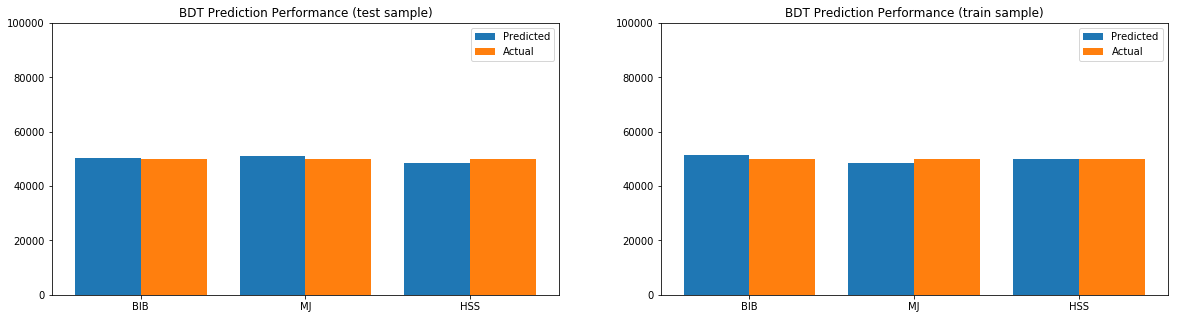

In [52]:
def plot_perf_generic(sp_info, train_info, title):
    ax = plt.subplot(sp_info)
    ax.set_ylim(0,100000)
    ax.hist([train_info.PredClass, train_info.Class], label=["Predicted", "Actual"], bins=[0,1,2,3])
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(['BIB', 'MJ', 'HSS'])
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(20,5))
plot_perf_generic(121, test_classes, "BDT Prediction Performance (test sample)")
plot_perf_generic(122, train_classes, "BDT Prediction Performance (train sample)")
fig

C:\Users\gordonwatts\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


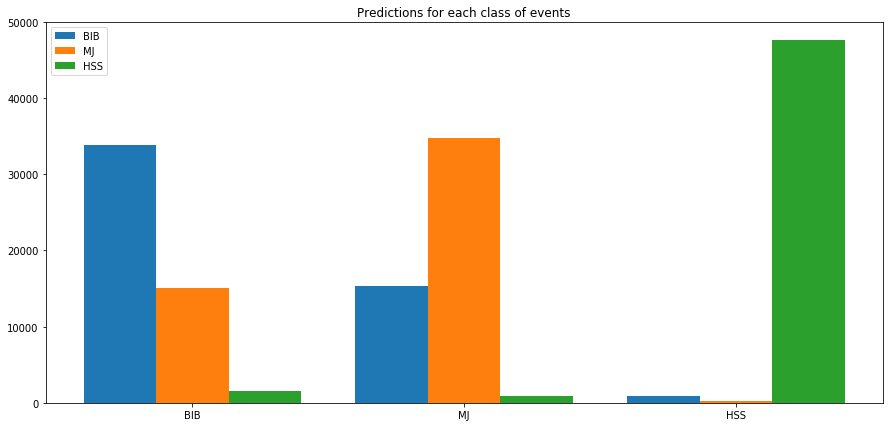

In [53]:
def plot_perf_for_class(sp_info, train_info):
    ax = plt.subplot(sp_info)
    
    bib = train_info[train_info.Class == 0]
    mj = train_info[train_info.Class == 1]
    hss = train_info[train_info.Class == 2]
    
    ax.hist([bib.PredClass, mj.PredClass, hss.PredClass], label=['BIB', 'MJ', 'HSS'], bins=[0,1,2,3])
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(['BIB', 'MJ', 'HSS'])
    ax.legend()
    ax.set_title('Predictions for each class of events')

fig = plt.figure(figsize=(15,7))
plot_perf_for_class(111, test_classes)
fig